In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv('dataset/preprocessed.csv')
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded,income_encoded
0,39.0,77516,13,2174.000000,1872.178505,40,5,9,4,0,1,4,1,38,0
1,50.0,83311,13,13142.185488,1872.178505,13,4,9,2,3,0,4,1,38,0
2,38.0,215646,9,13142.185488,1872.178505,40,2,11,0,5,1,4,1,38,0
3,53.0,234721,7,13142.185488,1872.178505,40,2,1,2,5,0,2,1,38,0
4,28.0,338409,13,13142.185488,1872.178505,40,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33.0,245211,13,13142.185488,1872.178505,40,2,9,4,9,3,4,1,38,0
45217,39.0,215419,13,13142.185488,1872.178505,36,2,9,0,9,1,4,0,38,0
45218,38.0,374983,13,13142.185488,1872.178505,50,2,9,2,9,0,4,1,38,0
45219,44.0,83891,13,5455.000000,1872.178505,40,2,9,0,0,3,1,1,38,0


In [63]:
# Split data into features and target 
x = df.drop('income_encoded', axis=1)
y = df['income_encoded']

In [64]:
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded
0,39.0,77516,13,2174.000000,1872.178505,40,5,9,4,0,1,4,1,38
1,50.0,83311,13,13142.185488,1872.178505,13,4,9,2,3,0,4,1,38
2,38.0,215646,9,13142.185488,1872.178505,40,2,11,0,5,1,4,1,38
3,53.0,234721,7,13142.185488,1872.178505,40,2,1,2,5,0,2,1,38
4,28.0,338409,13,13142.185488,1872.178505,40,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33.0,245211,13,13142.185488,1872.178505,40,2,9,4,9,3,4,1,38
45217,39.0,215419,13,13142.185488,1872.178505,36,2,9,0,9,1,4,0,38
45218,38.0,374983,13,13142.185488,1872.178505,50,2,9,2,9,0,4,1,38
45219,44.0,83891,13,5455.000000,1872.178505,40,2,9,0,0,3,1,1,38


In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45219    0
45220    1
Name: income_encoded, Length: 45221, dtype: int64

In [66]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [67]:
len(x_train), len(x_test), len(y_train), len(y_test)

(36176, 9045, 36176, 9045)

# Train Random Forest

In [68]:
rf = RandomForestClassifier()

In [69]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_predict = rf.predict(x_test)

In [71]:
rf_accuracy = accuracy_score(y_test, y_predict)
rf_accuracy

0.8546158098396904

In [72]:
rf.score(x_test,y_test)

0.8546158098396904

In [73]:
rf.score(x_train,y_train)

0.9998894294559929

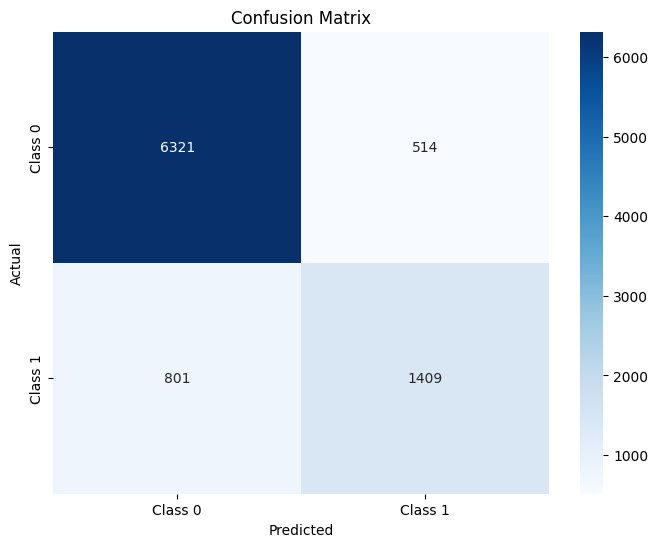

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
